In [1]:
# Imports
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import gc
from IPython.display import display

# Sci-kit Learn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load file
df = pd.read_csv("all_merged_sw.csv",
                 usecols=['adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
                          'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X', 
                          'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
                          'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
                          'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
                          'adjclose_1_X', 'adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                          'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y',
                          'adjclose_9_Y', 'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y',
                          'adjclose_13_Y', 'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                          'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y',
                          'adjclose_21_Y'])

df

,adjclose_20_X,adjclose_19_X,adjclose_18_X,adjclose_17_X,adjclose_16_X,adjclose_15_X,adjclose_14_X,adjclose_13_X,adjclose_12_X,adjclose_11_X,...,adjclose_12_Y,adjclose_13_Y,adjclose_14_Y,adjclose_15_Y,adjclose_16_Y,adjclose_17_Y,adjclose_18_Y,adjclose_19_Y,adjclose_20_Y,adjclose_21_Y
0,52.026543,51.579323,50.899178,51.113464,49.315266,49.231415,48.467411,50.414680,50.787373,49.864975,...,48.734329,49.016304,48.236179,46.995499,47.221077,46.967300,49.223080,49.345276,50.144196,50.943123
1,410.399994,412.209991,403.850006,407.559998,402.260010,401.640015,394.000000,405.670013,422.100006,418.700012,...,421.739990,429.119995,424.959991,420.950012,405.570007,409.929993,411.890015,408.670013,414.369995,398.019989
2,38.873425,39.189323,38.214558,38.683891,38.115276,38.187477,38.061119,38.268715,38.377018,38.286758,...,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271
3,38.873425,39.189323,38.214558,38.683891,38.115276,38.187477,38.061119,38.268715,38.377018,38.286758,...,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271
4,38.873425,39.189323,38.214558,38.683891,38.115276,38.187477,38.061119,38.268715,38.377018,38.286758,...,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940780,5.650000,6.020000,5.830000,6.150000,5.700000,5.500000,5.260000,5.240000,5.240000,5.170000,...,5.420000,5.450000,5.330000,5.380000,5.440000,5.500000,5.250000,5.190000,5.070000,5.120000
940781,4.270000,4.500000,4.620000,4.510000,4.590000,4.440000,4.330000,4.200000,4.330000,4.240000,...,5.530000,5.800000,5.650000,5.520000,5.230000,6.450000,9.520000,12.990000,9.010000,9.400000
940782,15.030000,15.360000,15.120000,15.160000,14.990000,15.150000,14.240000,14.240000,14.610000,14.760000,...,22.190001,22.400000,22.600000,22.639999,22.100000,21.660000,21.360001,21.150000,21.000000,21.590000
940783,28.073952,29.172199,29.535013,30.162582,28.730938,28.191620,28.436766,28.417154,28.495598,28.417154,...,31.354565,31.205917,30.700518,31.364473,31.255468,30.720339,28.926668,29.550983,28.738380,29.313148


In [3]:
# Print the colum names
df.columns.values

array(['adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X', 'adjclose_17_X',
       'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X', 'adjclose_13_X',
       'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X', 'adjclose_9_X',
       'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X', 'adjclose_5_X',
       'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X', 'adjclose_1_X',
       'adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y',
       'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y',
       'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
       'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y',
       'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y'],
      dtype=object)

In [4]:
# Find the min and max at 1-4 business week intervals
df['5day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmin(axis=1)

df['10day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmin(axis=1)

df['15day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmin(axis=1)

df['20day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmin(axis=1)

df['5day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmax(axis=1)

df['10day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmax(axis=1)

df['15day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmax(axis=1)

df['20day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmax(axis=1)

# Extract the day number and convert to int
df['5day_min'] = df['5day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_min'] = df['10day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_min'] = df['15day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_min'] = df['20day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['5day_max'] = df['5day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_max'] = df['10day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_max'] = df['15day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_max'] = df['20day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)

In [5]:
# Get the X-variable columns
df_X = df[['adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
           'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
           'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
           'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
           'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
           'adjclose_1_X']].to_numpy()

# Get the Y-variable columns
df_Y = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y',
           'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y',
           'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
           'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y',
           'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
           '5day_min', '10day_min', '15day_min', '20day_min', '5day_max',
           '10day_max', '15day_max', '20day_max']].to_numpy()

# Clear up memory
del df
gc.collect()

# Get 80% of the data by date
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,
                                                    shuffle=False)

# Print
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 52.02654266  51.57932281  50.89917755 ...  52.13834381  51.69112778
   50.32151794]
 [410.3999939  412.20999146 403.8500061  ... 418.19000244 423.57000732
  424.11999512]
 [ 38.87342453  39.18932343  38.21455765 ...  37.21271133  37.09537888
   36.59896469]
 ...
 [124.01503754 127.77788544 125.05794525 ... 128.88563538 127.82733154
  128.85595703]
 [ 22.59499931  20.13999939  18.60000038 ...  21.10000038  21.59000015
   24.35000038]
 [  7.61999989   7.9000001    7.36999989 ...   7.1500001    7.07999992
    6.69999981]]
[[ 3.8900001   3.82999992  3.95000005 ...  4.40999985  4.36000013
   4.3499999 ]
 [21.7001915  21.67077446 21.96074867 ... 21.76743317 22.11540222
  21.88342476]
 [ 1.35000002  1.38        1.80999994 ...  2.04999995  2.05999994
   2.1099999 ]
 ...
 [15.02999973 15.35999966 15.11999989 ... 14.81000042 14.27000046
  13.63000011]
 [28.07395172 29.17219925 29.5350132  ... 22.61213112 24.74979019
  24.33794785]
 [ 9.03999996  8.5         7.46999979 ...  6.          6.61999

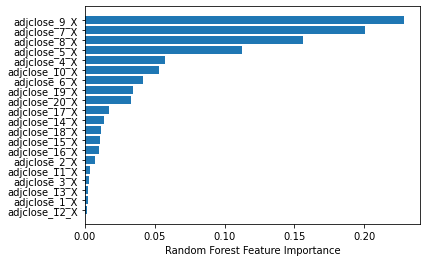

In [6]:
# Initialize Model
RFRegressor = RandomForestRegressor(bootstrap=False, criterion='mse',
                                    max_depth=6, max_leaf_nodes=None, max_features=0.33,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    n_estimators=400, n_jobs=None, oob_score=False,
                                    random_state=1, verbose=0, warm_start=False) 

# Train
RFRegressor.fit(X_train,y_train)

# Feature importance
cols = ['adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
        'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
        'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
        'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
        'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
        'adjclose_1_X']
sorted_idx = RFRegressor.feature_importances_.argsort()
plt.barh([cols[i] for i in sorted_idx], RFRegressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Predict
ypred = RFRegressor.predict(X_test)

In [7]:
# Evaluate RMSE
rmse = mean_squared_error(y_test, ypred, multioutput='raw_values', squared=False)

# For each value in rmse
for i in range(1, len(rmse)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The RMSE for adjClose_{}_Y = ".format(i+1), rmse[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The RMSE for {}day_min = ".format((i-20)*5), rmse[i-1])

    # Print the RMSE for max day
    else:
        print("The RMSE for {}day_max = ".format((i-24)*5), rmse[i-1])

The RMSE for adjClose_2_Y =  39.12701655465314
The RMSE for adjClose_3_Y =  39.03292780155964
The RMSE for adjClose_4_Y =  40.65277076953048
The RMSE for adjClose_5_Y =  42.17594749837746
The RMSE for adjClose_6_Y =  44.10506227597859
The RMSE for adjClose_7_Y =  45.6197887267683
The RMSE for adjClose_8_Y =  47.209699640231314
The RMSE for adjClose_9_Y =  50.04789586230973
The RMSE for adjClose_10_Y =  50.48142721275272
The RMSE for adjClose_11_Y =  52.432047455600916
The RMSE for adjClose_12_Y =  54.44643347588417
The RMSE for adjClose_13_Y =  57.224602096630015
The RMSE for adjClose_14_Y =  58.144754908924
The RMSE for adjClose_15_Y =  60.94287358729957
The RMSE for adjClose_16_Y =  61.77978691398939
The RMSE for adjClose_17_Y =  62.92777740312497
The RMSE for adjClose_18_Y =  64.17530766264753
The RMSE for adjClose_19_Y =  65.14083908642823
The RMSE for adjClose_20_Y =  65.97502845047899
The RMSE for adjClose_21_Y =  67.00117551759442
The RMSE for 5day_min =  1.5520649532276398
The 

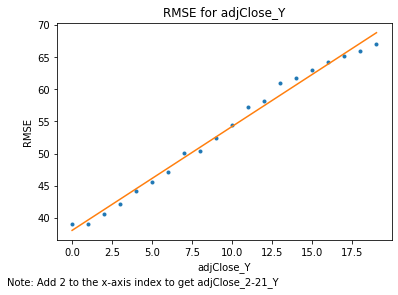

In [8]:
# Plot the RMSE for adjClose
x = np.arange(20)
y = rmse[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('RMSE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()

In [9]:
# Evaluate MAE
mae = mean_absolute_error(y_test, ypred, multioutput='raw_values')

# For each value in mae
for i in range(1, len(mae)+1):

    # Print the MAE values for adjClose
    if i < 21:
        print("The MAE for adjClose_{}_Y = ".format(i+1), mae[i-1])

    # Print the MAE values for min day
    elif 21 <= i < 25:
        print("The MAE for {}day_min = ".format((i-20)*5), mae[i-1])

    # Print the MAE for max day
    else:
        print("The MAE for {}day_max = ".format((i-24)*5), mae[i-1])

The MAE for adjClose_2_Y =  14.8487411101846
The MAE for adjClose_3_Y =  14.846876282481507
The MAE for adjClose_4_Y =  15.27004270550585
The MAE for adjClose_5_Y =  15.631298466254353
The MAE for adjClose_6_Y =  16.17330317435057
The MAE for adjClose_7_Y =  16.72694650715033
The MAE for adjClose_8_Y =  17.09905185556463
The MAE for adjClose_9_Y =  17.778491958202885
The MAE for adjClose_10_Y =  18.031377972758964
The MAE for adjClose_11_Y =  18.61542933947143
The MAE for adjClose_12_Y =  19.050315649417136
The MAE for adjClose_13_Y =  19.78666581742762
The MAE for adjClose_14_Y =  20.1831311782866
The MAE for adjClose_15_Y =  21.11348511691469
The MAE for adjClose_16_Y =  21.429650174279097
The MAE for adjClose_17_Y =  21.82149197942719
The MAE for adjClose_18_Y =  22.20156702953096
The MAE for adjClose_19_Y =  22.441873859249508
The MAE for adjClose_20_Y =  22.689996783327928
The MAE for adjClose_21_Y =  22.957525751113284
The MAE for 5day_min =  1.3852524130094803
The MAE for 10day_

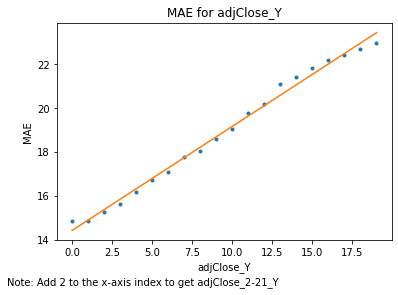

In [10]:
# Plot the MAE for adjClose
x = np.arange(20)
y = mae[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('MAE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('MAE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()